In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import torch
from sklearn.manifold import TSNE
import torch
import torch.nn.functional as F
from torch_geometric.utils.convert import from_networkx
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt
from contingency.models.network import Network
from contingency.controllers.screener import ExhaustiveScreener


def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    fig, ax = plt.subplots(figsize=(6, 6))

    cmap = [
        "#f76469",
        "#4405f2",
    ]

    for i in range(2):
        ax.scatter(
            z[color == i, 0], z[color == i, 1], s=70, c=cmap[i], label=f"{i}"
        )
    plt.legend()
    plt.tight_layout()
    plt.show()
    

In [2]:
def compara_delta_cfb_ciclos(ni: int, nf: int, arestas: list):
    max_deltas = []
    nos = list(range(ni, nf + 1))
    for i in nos:
        G = nx.cycle_graph(i)
        for a in arestas:
            G.add_edge(*a)
        G = nx.relabel_nodes(G, {n: str(n) for n in G.nodes()})
        net = Network("Cycle", G)
        k = 1
        screener = ExhaustiveScreener(net)
        deltas = screener.global_deltas(k)
        max_deltas.append(max(list(deltas.values())))
    return nos, max_deltas

In [3]:
n_base, deltas_base = compara_delta_cfb_ciclos(118, 118, [])

#plt.scatter(n_base, deltas_base)
#plt.show()
deltas_base



[15.531977600942492]

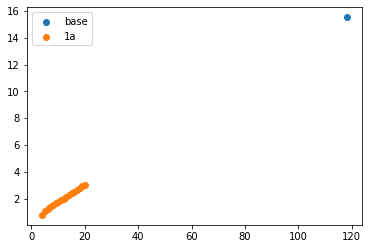

In [4]:
n_1a, deltas_1a = compara_delta_cfb_ciclos(4, 20, [(1, 3)])
fig, ax = plt.subplots()
ax.scatter(n_base, deltas_base, label="base")
ax.scatter(n_1a, deltas_1a, label="1a")
ax.legend()
plt.show()


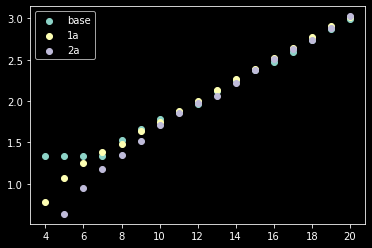

In [22]:
n_2a, deltas_2a = compara_delta_cfb_ciclos(5, 20, [(1, 3), (1, 4)])
fig, ax = plt.subplots()
ax.scatter(n_base, deltas_base, label="base")
ax.scatter(n_1a, deltas_1a, label="1a")
ax.scatter(n_2a, deltas_2a, label="2a")
ax.legend()
plt.show()

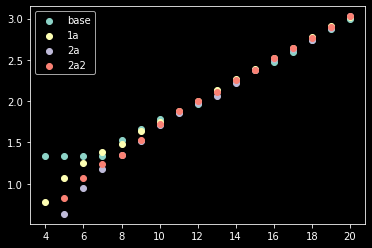

In [24]:
n_2a2, deltas_2a2 = compara_delta_cfb_ciclos(5, 20, [(1, 3), (2, 4)])
fig, ax = plt.subplots()
ax.scatter(n_base, deltas_base, label="base")
ax.scatter(n_1a, deltas_1a, label="1a")
ax.scatter(n_2a, deltas_2a, label="2a")
ax.scatter(n_2a2, deltas_2a2, label="2a2")
ax.legend()
plt.show()